In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
# 1. Load Dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\MINI_project\Data_p\preprocessed.csv")
df.drop(columns=["RISK_MM"], inplace=True)

# 2. Feature & Target
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"].astype(int)

# 3. Normalize Input
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# 5. Build ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# 7. Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# 8. Evaluation
acc = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred)
prec_0 = precision_score(y_test, y_pred, pos_label=0)
rec_1 = recall_score(y_test, y_pred)
rec_0 = recall_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
gmean = np.sqrt(rec_1 * rec_0) 
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

D:\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8118 - loss: 0.4249 - val_accuracy: 0.8414 - val_loss: 0.3772
Epoch 2/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8379 - loss: 0.3743 - val_accuracy: 0.8447 - val_loss: 0.3626
Epoch 3/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8399 - loss: 0.3693 - val_accuracy: 0.8441 - val_loss: 0.3603
Epoch 4/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8431 - loss: 0.3667 - val_accuracy: 0.8414 - val_loss: 0.3606
Epoch 5/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8436 - loss: 0.3618 - val_accuracy: 0.8462 - val_loss: 0.3549
Epoch 6/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8453 - loss: 0.3605 - val_accuracy: 0.8460 - val_loss: 0.3559
Epoch 7/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8435 - loss: 0.3616 - val_accuracy: 0.8452 - val_loss: 0.3557
Epoch 8/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8440 - loss: 0.3604 - 

ANN Results:
Accuracy       : 0.85
Precision (1)  : 0.74
Precision (0)  : 0.87
Recall (1)     : 0.49
Recall (0)     : 0.95
F1 Score (1)   : 0.59
F1 Score (0)   : 0.91
G-Mean         : 0.68
ROC AUC Score  : 0.87

Confusion Matrix:
 [[21032  1066]
 [ 3246  3095]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.74      0.49      0.59      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



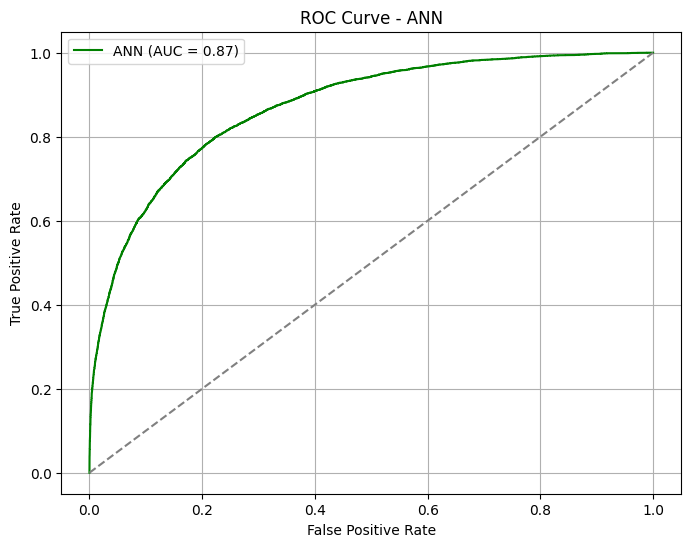

In [6]:
# 9. Output
print("ANN Results:")
print(f"Accuracy       : {acc:.2f}")
print(f"Precision (1)  : {prec_1:.2f}")
print(f"Precision (0)  : {prec_0:.2f}")
print(f"Recall (1)     : {rec_1:.2f}")
print(f"Recall (0)     : {rec_0:.2f}")
print(f"F1 Score (1)   : {f1_1:.2f}")
print(f"F1 Score (0)   : {f1_0:.2f}")
print(f"G-Mean         : {gmean:.2f}")
print(f"ROC AUC Score  : {auc:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ANN (AUC = {auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Save model
model.save("ann_model.h5")

In [8]:
import pickle

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [9]:
from tensorflow.keras.models import load_model
import pickle

# Load the trained ANN model (without compiling for training)
model = load_model("C:/Users/ASUS/Desktop/MINI_project/model/ANN/ann_model.h5", compile=False)

# Load the scaler used during training
with open("C:/Users/ASUS/Desktop/MINI_project/model/ANN/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print("Model and scaler loaded successfully.")

Model and scaler loaded successfully.


In [10]:
from tensorflow.keras.models import load_model
model = load_model("ann_model.h5")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,339 (118.52 KB)

 Trainable params: 30,337 (118.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)